In [ ]:
import numpy as np
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [ ]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
'''
X_test = X_test[:100]
y_test = y_test[:100]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)
'''

'\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\npca = PCA(n_components=2)\nX_train = pca.fit_transform(X_train_scaled)\nX_test = pca.transform(X_test_scaled)\n'

In [ ]:
def distance(x1,x2,p,degree = 3):
       if(p == "euclidean"):
           dis = np.linalg.norm(x1-x2,axis = 0)
           return dis
       if(p == "manhattan"):
           dis = np.sum(np.abs(x1-x2),axis = 0)
           return dis
       if(p == "minkowski"):
           return np.sum(np.abs(x1-x2)**degree,axis = 0)**(1/degree)
       if(p == "cosine"):
           return 1-np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
       if(p == "hamming"):
           return np.sum(x1!=x2,axis = 0)

In [ ]:
class KNN2:
  def __init__(self,k,p,degree = 3):
    self.k = k
    self.p = p
    self.degree = degree
  def fit(self,X,y):
    self.X_train = X
    self.y_train = y


  def predict(self,X):
    predictions = np.array([self.__predict(x) for x in X])
    return predictions

  def __predict(self,x):
    distances = np.array([distance(x,x_train,self.p,self.degree) for x_train in self.X_train])
    k_indices = np.argpartition(distances,self.k)[:self.k]
    k_nearest_labels = [self.y_train[i].item() for i in k_indices]
    # majority vote
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]


In [ ]:
cifar10_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [ ]:
dis = ["euclidean","manhattan","minkowski","cosine","hamming"]
k_values = [3,4,9,20,47]
max_k = 0
max_acc = 0
max_dis =""

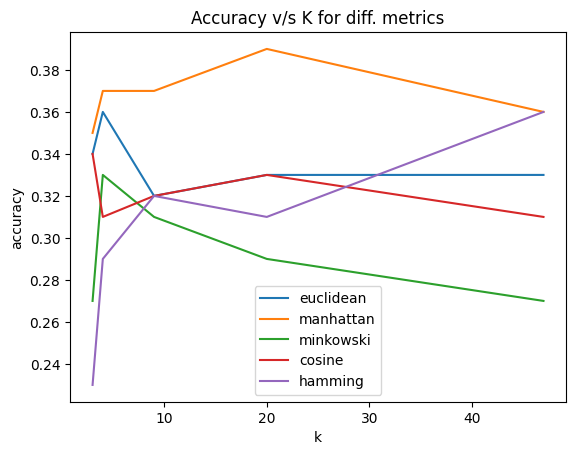

most accurate combination:
acc =  39.0 %
k =  20
distance =  manhattan


In [ ]:
for d in dis:
    res = []
    for k in k_values:
       model = KNN2(k,d)
       model.fit(X_train,y_train)
       predictions = model.predict(X_test)
       acc = np.sum(predictions == y_test) / len(y_test)
       if(acc>max_acc):
           max_acc = acc
           max_k = k
           max_dis = d
       res.append(acc)
    plt.plot(k_values,res,label=d)
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('Accuracy v/s K for diff. metrics')
plt.show()
print("most accurate combination:")
print("acc = ",max_acc*100,'%')
print("k = ",max_k)
print("distance = ",max_dis)

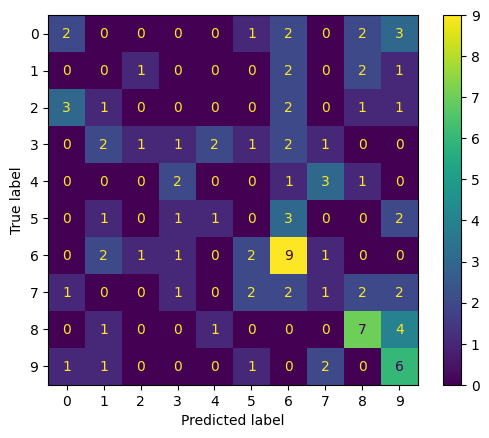

In [ ]:
model = KNN2(max_k,max_dis)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
num_classes = cm.shape[0]

precisions = []
recalls = []

for i in range(num_classes):
    tp = cm[i, i]
    fp = sum(cm[i, j] for j in range(num_classes) if j != i)
    fn = sum(cm[j, i] for j in range(num_classes) if j != i)

    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    precisions.append(precision)
    recalls.append(recall)

macro_precision = sum(precisions) / num_classes
macro_recall = sum(recalls) / num_classes

print("Macro-averaged precision = ", macro_precision)
print("Macro-averaged recall = ", macro_recall)


Macro-averaged precision =  0.20373251748251747
Macro-averaged recall =  0.17511414405579165
